# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data
* Handling files and formats
* Data Analysis 
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [2]:
df = pd.read_csv("C:/Users/Ashwinkumar/Desktop/Bright Academy/MLBasics-master/Data/Salary_Data.csv")

In [3]:
df_train = df.iloc[0:20]
df_test = df.iloc[20:30]

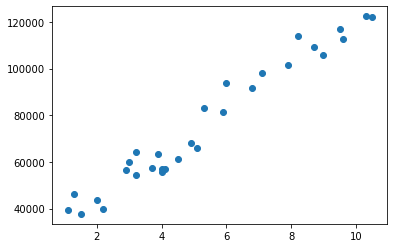

In [4]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.show()

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [5]:
def simple_linear_regression(dataframe):
    x = dataframe["YearsExperience"]
    y = dataframe["Salary"]
    mean_x = x.mean()
    mean_y = y.mean()
    beta_num = ((x - mean_x)*(y - mean_y)).sum()
    beta_den = ((x - mean_x)**2).sum()
    beta = beta_num/beta_den
    beta = round(beta,3)
    alpha = mean_y - (beta*mean_x)
    alpha = round(alpha,3)
    estimated_salary = alpha + (beta*x)
    dataframe = dataframe.assign(EstimatedSalary = estimated_salary)
    rss = ((y - estimated_salary)**2).sum()
    tss = ((y - mean_y)**2).sum()
    R_squared = 1 - (rss/tss)
    R_squared = round(R_squared,3)
    return dict(zip(('Dataframe','Alpha','Beta','R_squared'),(dataframe,alpha,beta,R_squared)))

In [6]:
results = simple_linear_regression(df_train)

In [10]:
df_train_new = results['Dataframe']

In [11]:
df_train_new

,YearsExperience,Salary,EstimatedSalary
0,1.1,39343.0,36605.1264
1,1.3,46205.0,38428.3492
2,1.5,37731.0,40251.5720
3,2.0,43525.0,44809.6290
4,2.2,39891.0,46632.8518
5,2.9,56642.0,53014.1316
6,3.0,60150.0,53925.7430
7,3.2,54445.0,55748.9658
8,3.2,64445.0,55748.9658
9,3.7,57189.0,60307.0228


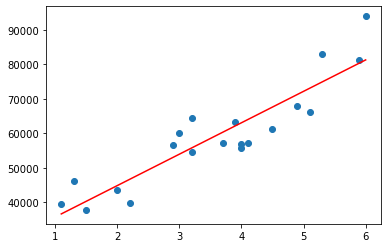

In [12]:
plt.scatter(df_train_new["YearsExperience"],df_train_new["Salary"])
plt.plot(df_train_new["YearsExperience"],df_train_new["EstimatedSalary"],color = "red")
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [13]:
#shuffling dataset
df_logistic = df.sample(frac=1).reset_index().drop(["index"], axis =1)

In [14]:
#assigning binary variable
df_logistic = df_logistic.assign(Salary60000 = [1 if df_logistic["Salary"][i] < 60000 else 0 for i in range(0,30)])

In [15]:
#splitting into train and test dataset
df_logistic_train = df_logistic.iloc[0:20]
df_logistic_test = df_logistic.iloc[20:30]

In [16]:
df_logistic_train = df_logistic_train.sort_values(by = "YearsExperience").reset_index().drop(["index"], axis =1) 
df_logistic_test = df_logistic_test.sort_values(by = "YearsExperience").reset_index().drop(["index"], axis =1) 

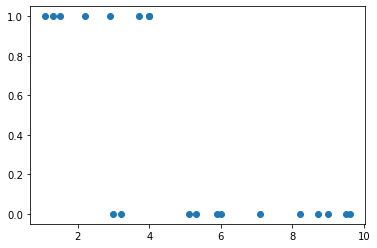

In [17]:
plt.scatter(np.array(df_logistic_train["YearsExperience"]),np.array(df_logistic_train["Salary60000"]))

In [18]:
def logistic_regression_gradient(params, dataframe):
    x_train = np.array(dataframe["YearsExperience"])
    y_train = np.array(dataframe["Salary60000"])
    
    num = np.exp(params[0] + params[1]*x_train)
    den = 1 + num
    p = num / den
    
    partial_beta0 = np.sum(y_train - p)
    partial_beta1 = np.sum((y_train - p) * x_train)
    
    return np.array([partial_beta0, partial_beta1])

In [19]:
def fit_model():
    betas = np.array([0.0,0.0])
    diff = np.inf
    learning_rate = 0.001

    while diff > 0.0001:
        gradient = logistic_regression_gradient(betas, df_logistic_train)
        diff = abs(gradient).sum()
    
        betas += learning_rate*gradient
    return betas

In [41]:
betas = fit_model()
betas

array([ 5.36348022, -1.38171861])

In [21]:
def calc_probs(dataframe, betas):
    x_train = np.array(dataframe["YearsExperience"])
    y_train = np.array(dataframe["Salary60000"])
    
    num = np.exp(betas[0] + betas[1]*x_train)
    
    p = num / (1 + num)
    
    dataframe = dataframe.assign(CalcProb = p)
    
    return dataframe

In [22]:
df_logistic_train = calc_probs(df_logistic_train, betas)

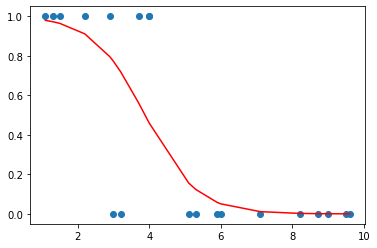

In [23]:
plt.scatter(np.array(df_logistic_train["YearsExperience"]),np.array(df_logistic_train["Salary60000"]))
plt.plot(np.array(df_logistic_train["YearsExperience"]),np.array(df_logistic_train["CalcProb"]), color = "red")
plt.show()

In [24]:
def pred_probs(dataframe):
    dataframe = dataframe.assign(PredProb = [1 if dataframe["CalcProb"][i] > 0.6 else 0 for i in range(len(dataframe))])
    return dataframe

In [25]:
df_logistic_train = pred_probs(df_logistic_train)

In [26]:
def logistic_metrics(dataframe):
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for i in range(0,20):
        if dataframe["Salary60000"][i] == 1:
            if dataframe["PredProb"][i] == 1:
                true_pos += 1
            elif dataframe["PredProb"][i] == 0:
                false_pos += 1
        elif dataframe["Salary60000"][i] == 0:
            if dataframe["PredProb"][i] == 0:
                true_neg += 1
            elif dataframe["PredProb"][i] == 1:
                false_neg += 1     
    precision = round(true_pos / (true_pos + false_pos), 2) 
    recall = round(true_pos / (true_pos + false_neg), 2)
    accuracy = round((true_pos + true_neg) / 20, 2) 
    f1_score = round((2*recall*precision) / recall + precision, 2)
    return dict(zip(('precision','recall','accuracy','f1_score'),(precision,recall,accuracy,f1_score))) 

In [27]:
logistic_metrics(df_logistic_train)

{'precision': 0.62, 'recall': 0.71, 'accuracy': 0.75, 'f1_score': 1.86}

In [42]:
# Checking with in-built LogisticRegression function 
clf = LogisticRegression(penalty = "none")
clf.fit(np.array(df_logistic_train["YearsExperience"]).reshape(-1,1), np.array(df_logistic_train["Salary60000"]))
print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: 5.3640586621252035
beta_1: -1.3818591253124188


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

#### Analysing Linear Regression

In [28]:
R_sq = results["R_squared"]
R_sq

0.824

In [29]:
def predict_salary(dataframe, reg_results):
    x_test = dataframe["YearsExperience"]
    y_test = dataframe["Salary"]
    num = len(x_test)
    predicted_salary = round(reg_results["Alpha"] + (reg_results["Beta"] * x_test),2)
    dataframe = dataframe.assign(PredictedSalary = predicted_salary)
    prediction_errors_sq = (y_test - predicted_salary)**2
    rmse = (prediction_errors_sq.sum()/num)**0.5
    return dict(zip(("Dataframe","RMSE"),(dataframe,rmse)))

In [30]:
predicted_salary = predict_salary(df_test, results)

In [31]:
df_new = predicted_salary["Dataframe"]
df_new

,YearsExperience,Salary,PredictedSalary
20,6.8,91738.0,88566.98
21,7.1,98273.0,91301.81
22,7.9,101302.0,98594.70
23,8.2,113812.0,101329.54
24,8.7,109431.0,105887.59
25,9.0,105582.0,108622.43
26,9.5,116969.0,113180.48
27,9.6,112635.0,114092.10
28,10.3,122391.0,120473.38
29,10.5,121872.0,122296.60


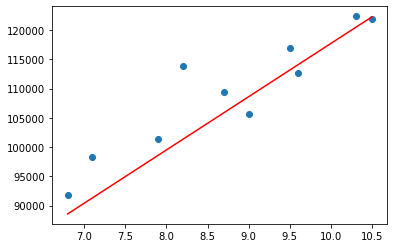

In [32]:
plt.scatter(df_new["YearsExperience"],df_new["Salary"])
plt.plot(df_new["YearsExperience"],df_new["PredictedSalary"],color = "red")
plt.show()

In [33]:
RMSE = predicted_salary["RMSE"]
RMSE

5137.389255603474

#### Analysing Logistic Regression

In [34]:
# Testing model accuracy with test data
def fit_test_logistic_model(dataframe, betas):
    x_test = np.array(dataframe["YearsExperience"])
    y_test = np.array(dataframe["Salary60000"])
    
    num = np.exp(betas[0] + betas[1]*x_test)
    
    p = num / (1 + num)
    
    dataframe = dataframe.assign(CalcProb = p)
    return dataframe

In [35]:
df_logistic_test = fit_test_logistic_model(df_logistic_test, betas)

In [36]:
df_logistic_test = pred_probs(df_logistic_test)

In [37]:
def analyse_logistic_model(dataframe):
    true_pos = 0.0
    true_neg = 0.0
    false_pos = 0.0
    false_neg = 0.0
    for i in range(len(dataframe)):
        if dataframe["Salary60000"][i] == 1:
            if dataframe["PredProb"][i] == 1:
                true_pos += 1
            elif dataframe["PredProb"][i] == 0:
                false_pos += 1
        elif dataframe["Salary60000"][i] == 0:
            if dataframe["PredProb"][i] == 0:
                true_neg += 1
            elif dataframe["PredProb"][i] == 1:
                false_neg += 1     
    precision = round(true_pos / (true_pos + false_pos), 2) 
    recall = round(true_pos / (true_pos + false_neg), 2)
    accuracy = round((true_pos + true_neg) / len(dataframe), 2) 
    f1_score = round((2*recall*precision) / recall + precision, 2)
    return dict(zip(('precision','recall','accuracy','f1_score'),(precision,recall,accuracy,f1_score)))

In [38]:
final_results = analyse_logistic_model(df_logistic_test)

In [39]:
final_results

{'precision': 0.67, 'recall': 1.0, 'accuracy': 0.9, 'f1_score': 2.01}